## <center>K-Nearest Neighbour</center>

** About Dataset**

1) ID number <br>
2) Diagnosis (M = malignant, B = benign) <br>
3) radius (mean of distances from center to points on the perimeter) <br>
4) texture (standard deviation of gray-scale values) <br>
5) perimeter <br>
6) area <br>
7) smoothness (local variation in radius lengths)<br>
8) compactness (perimeter^2 / area - 1.0) <br>
9) concavity (severity of concave portions of the contour) <br>
10) concave points (number of concave portions of the contour)<br>
11) symmetry <br>
12) fractal dimension ("coastline approximation" - 1)<br>

**<font color = green>AIM: To perform KNN algorithm on data set to build the model using Hyperparameter tuning (Grid SearchCV)</font>**

## Loading Libraries and Dataset

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,f1_score
import sklearn.metrics

In [9]:
df = pd.read_csv("attachment_Prostate_Cancer.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


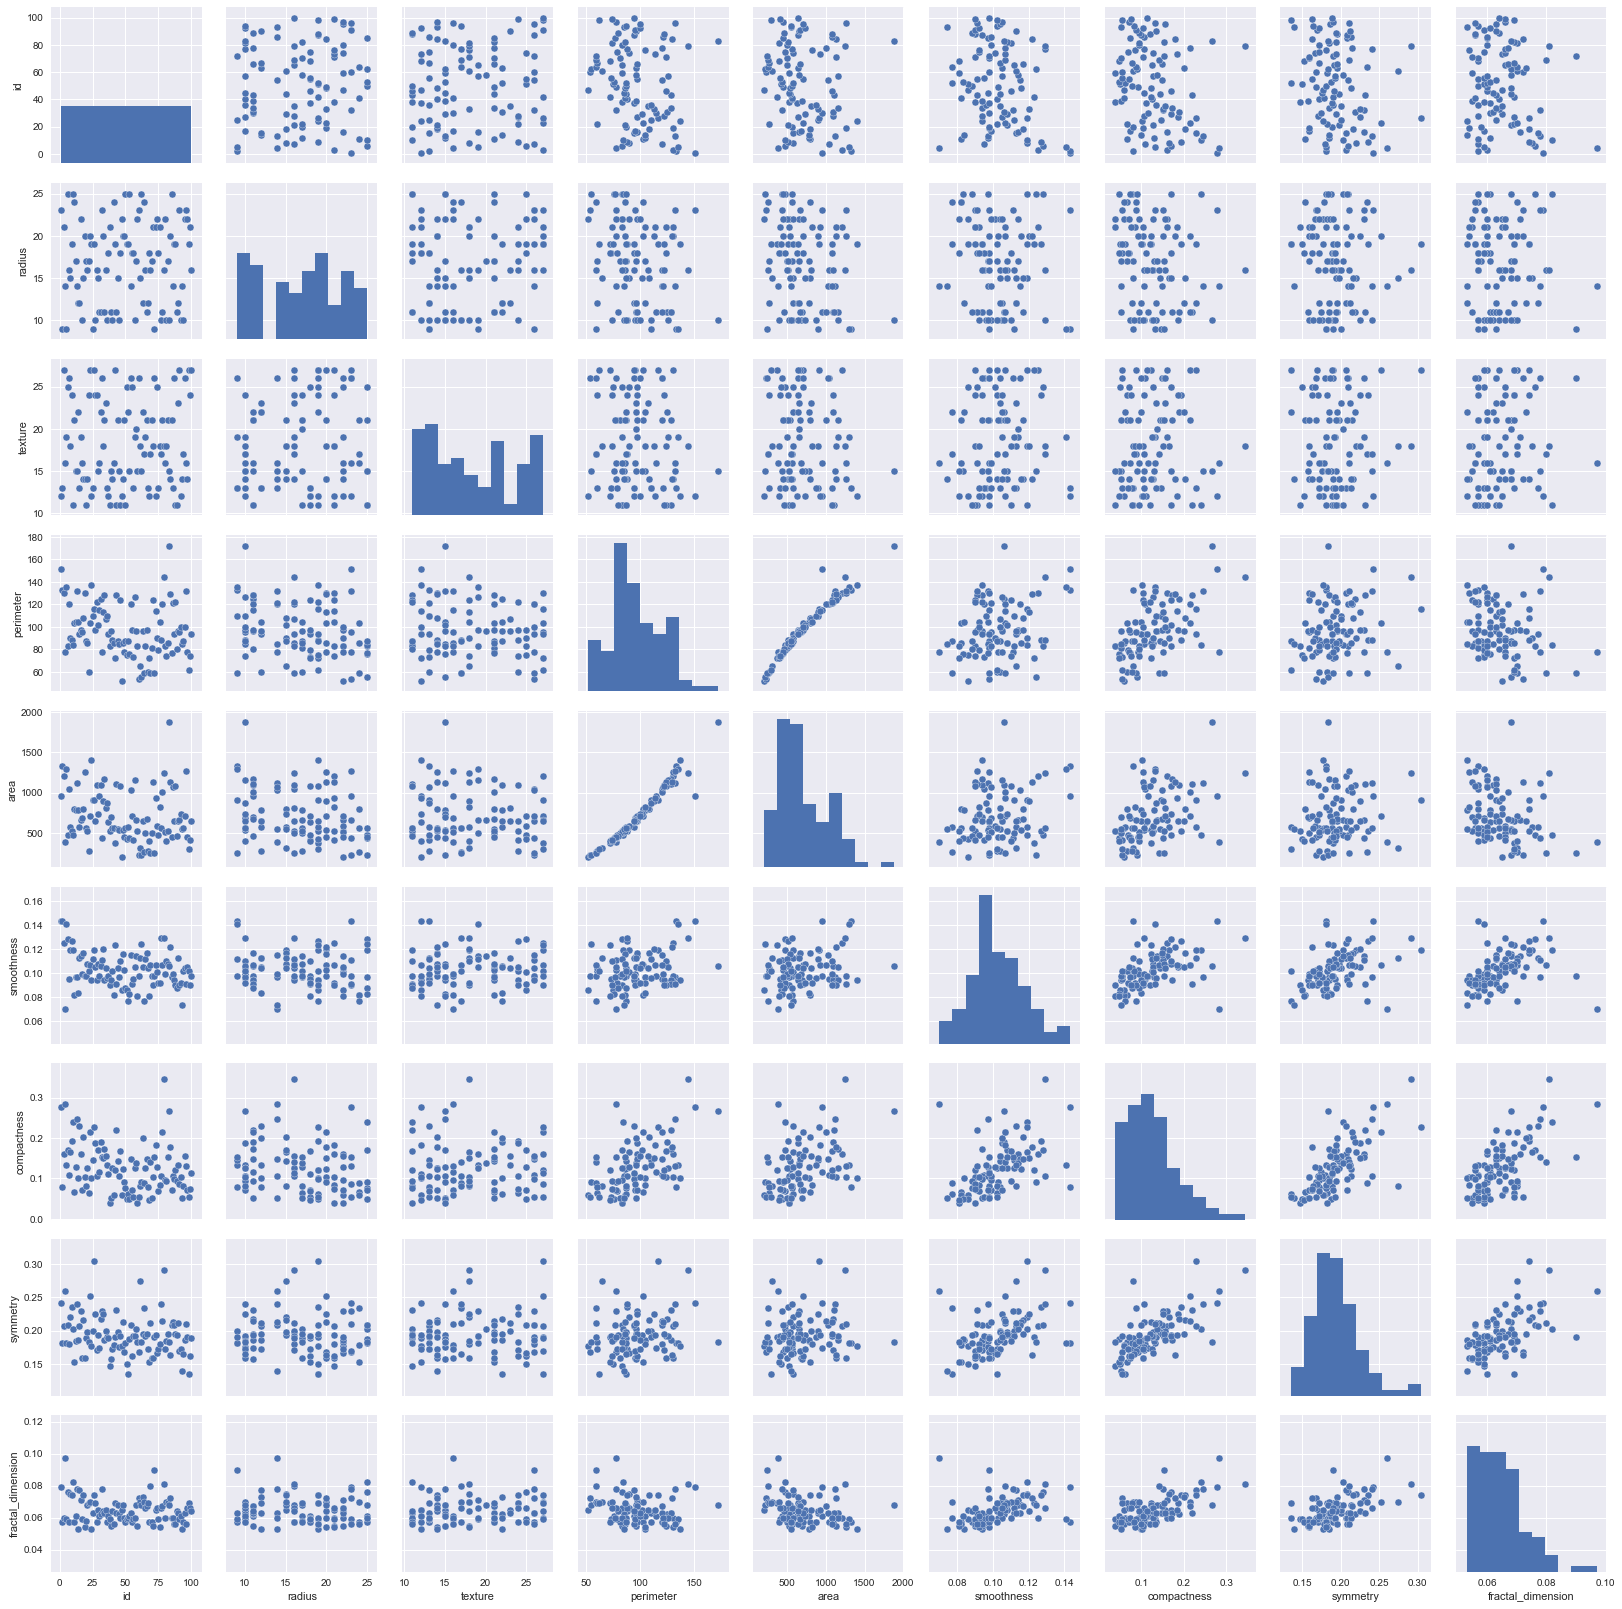

In [10]:
sns.pairplot(df)

** the data points are much scattered only area and perimeter are linearly correlated so we can omit either of them before feeding data in the algorithm.**

#### Defining the target variable and predictor variable

In [15]:
y = df["diagnosis_result"]
del df["diagnosis_result"]
x = df

In [16]:
del df["id"]
x.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [18]:
x.shape

(100, 8)

**checking the correlation coefficient**

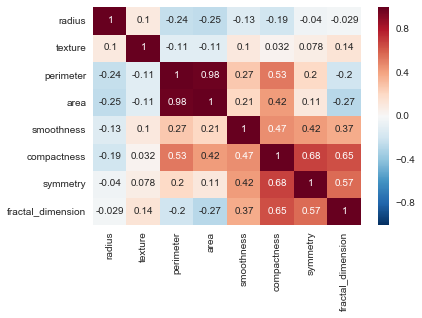

In [20]:
corr = x.corr()
sns.heatmap(corr, annot  = True)

In [21]:
del x["perimeter"]

**Trail : first selecting random integer value for nearest neighbour **

In [22]:
cl_knn = KNeighborsClassifier(n_neighbors=3)

In [23]:
cl_knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
crossvalscore = cross_val_score(estimator=cl_knn,X=x,y=y,cv=5)
print("cross_val score for simple knn:",crossvalscore.mean())
print("cross_val score for simple knn std:",crossvalscore.std())

cross_val score for simple knn: 0.790601503759
cross_val score for simple knn std: 0.0808638761362


** the mean score for 5-Fold cross validation method with 3 neighbours parameter of KNN algortihm is 0.79 and the standard deviation is 0 which means less variance. But this is only trial lets sets the hyperparameters and do it all over again **

### Using Grid Search and Hyper Parameters for futher model building

**we will keep cv = 5 as the std. is very less in it as compared with other cv values**

In [29]:
#param for knn algo are:
cl_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [30]:
grid_params = {'n_neighbors':[1,3,5,7,9,11,13,15,17], 
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

**Performing Grid Search**

In [33]:
grd_src= GridSearchCV(estimator=cl_knn,cv=5,param_grid=grid_params)   

In [34]:
grd_src.fit(x,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
grdcvscore = cross_val_score(estimator=grd_src,X=x,y=y,cv=5)
print("crossvalscore knn mean :{} knn std: {}".format(crossvalscore.mean(),crossvalscore.std()))
print("crossvalscore grd mean :{} grd std: {}".format(grdcvscore.mean(),grdcvscore.std()))

crossvalscore knn mean :0.7800751879699248 knn std: 0.07679772189739809
crossvalscore grd mean :0.8106516290726816 grd std: 0.04515522926453369


** so got better results with grid search that is improved mean score and lessere standard deviation**

In [35]:
grd_src.best_score_  ## the best score on an individual fold

0.82999999999999996

In [36]:
grd_src.best_params_  ## the best parametet which helped to give out better score

{'algorithm': 'auto', 'n_neighbors': 5}

In [37]:
#now we got our best parameters(previous field) and best model(knn with grid search instead of alone knn, see the cv score) 
#we will use these to predict the model
#also the value of K knn is final which is 5

**now using knn model for predicting with selected parameters**

**since KNN is supervised algorithm so we have to Split the dataset into test data and train data**

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [39]:
print(xtrain.shape,"\n",xtest.shape,"\n",ytrain.shape,"\n",ytest.shape)

(80, 7) 
 (20, 7) 
 (80,) 
 (20,)


In [42]:
grd_knn_ml= KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, weights = 'distance')  
## weights = distance , because we want our model to give preference on the distance factor of the data points 

#### Training and Fitting model

In [43]:
grd_knn_ml.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [44]:
pred1 = grd_knn_ml.predict(xtest)

In [45]:
print(accuracy_score(ytest,pred1))
print(classification_report(ytest,pred1))
print(confusion_matrix(ytest,pred1))

0.75
             precision    recall  f1-score   support

          B       0.40      0.50      0.44         4
          M       0.87      0.81      0.84        16

avg / total       0.77      0.75      0.76        20

[[ 2  2]
 [ 3 13]]


In [46]:
'''
Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
''';

In [47]:
print(ytest[:10],pred1[:10])

83    M
53    M
70    M
45    M
44    M
39    M
22    M
80    B
10    M
0     M
Name: diagnosis_result, dtype: object ['M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M']


** just checking it with other clasiffication algorithm**

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier()

In [77]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [78]:
#hyperparameters for rf classifier
rdf_params = {"bootstrap":[True,False],
              "criterion":['gini','entropy'],
              "n_estimators":[5,6,7,8,9,10]
               }

In [79]:
grd_srch = GridSearchCV(estimator = rf,param_grid=rdf_params,cv=5)

In [80]:
grd_srch.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'n_estimators': [5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [81]:
crss_rdf = cross_val_score(estimator=grd_srch, X=xtrain,y=ytrain,cv=5)
print("crosvalscore mean rdf:",crss_rdf.mean())
print("crosvalscore std rdf:",crss_rdf.std())

crosvalscore mean rdf: 0.813039215686
crosvalscore std rdf: 0.0373107811065


In [82]:
grd_srch.best_params_

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 7}

In [83]:
grd_srch.best_score_

0.875

In [84]:
#using random forest for prediction
rdf1 = RandomForestClassifier(random_state=42,bootstrap=True,criterion='gini',n_estimators=9)

In [85]:
rdf1.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [86]:
pred2 = rdf1.predict(xtest)

In [87]:
print(accuracy_score(ytest,pred2))
print(classification_report(ytest,pred2))
print(confusion_matrix(ytest,pred2))

0.75
             precision    recall  f1-score   support

          B       0.33      0.25      0.29         4
          M       0.82      0.88      0.85        16

avg / total       0.73      0.75      0.74        20

[[ 1  3]
 [ 2 14]]


#### now after scaling the data we will see the performance of both model
model 1 : knn with grid<br>
model 2 : random forest with grid

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc = StandardScaler()
xstd = sc.fit_transform(x)

In [90]:
xstd[0]

array([ 1.26683005, -1.20574648,  0.78941663,  2.76420965,  2.48697022,
        1.59415115,  1.76446414])

In [92]:
column = ['radius', 'texture', 'area', 'smoothness', 'compactness','symmetry', 'fractal_dimension']
#df.columns
#index.shape

In [93]:
df2 = pd.DataFrame(data=xstd[0:,0:],index=xstd[0:,0],columns=column)

In [94]:
df2.head()

,radius,texture,area,smoothness,compactness,symmetry,fractal_dimension
1.266830,1.266830,-1.205746,0.789417,2.764210,2.486970,1.594151,1.764464
-1.617011,-1.617011,-1.012208,1.958830,2.764210,-0.784061,-0.397314,-0.948199
0.854853,0.854853,1.697335,1.572169,1.528655,0.547364,0.451507,-0.578290
-0.587068,-0.587068,-0.431591,-0.996139,-2.246650,2.585594,2.181796,3.983916
-1.617011,-1.617011,0.149025,1.867666,2.626926,0.103555,-0.397314,-0.701593


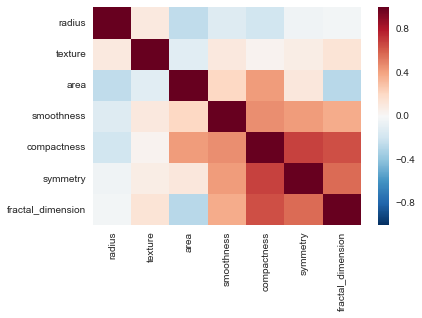

In [95]:
corr2 = df2.corr()
sns.heatmap(corr2)

In [96]:
xtr,xts,ytr,yts = train_test_split(xstd,y,test_size = 0.3,random_state = 42)

In [97]:
#MODEL 2: RANDOM FOREST WITH GRID
rdf2 = RandomForestClassifier()

In [98]:
rdf2.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [99]:
grd2 = GridSearchCV(estimator=rdf2,param_grid=rdf_params,cv=5)

In [100]:
grd2.fit(xtr,ytr)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'n_estimators': [5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [101]:
grd2_cross_val = cross_val_score(estimator=grd2,cv=5,X=xtr,y=ytr)

In [102]:
print(grd2_cross_val.mean(),"\n",grd2_cross_val.std())

0.857142857143 
 0.0638876565


In [103]:
grd2.best_params_

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 9}

In [104]:
grd2.best_score_

0.88571428571428568

In [126]:
rdf3 = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=9)

In [127]:
rdf3.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [128]:
pred3 = rdf3.predict(xts)

In [143]:
print(accuracy_score(yts,pred3))
print(classification_report(yts,pred3))
print(confusion_matrix(yts,pred3))

0.833333333333
             precision    recall  f1-score   support

          B       0.71      0.62      0.67         8
          M       0.87      0.91      0.89        22

avg / total       0.83      0.83      0.83        30

[[ 5  3]
 [ 2 20]]


** this model gave the best performance uptil now as the precision score increases we wont be relying on the accuracy score because we know that the data is unbalanced that number of benign are less as compared to malignant thatis we will check confusion matrix to see the real figures our model predicted**<br>

**Summary: **
1. Model gave us the precision of 83%
1. Out of 22 Malignant we were able to predict 20 correctly.
1. and out of 8 Beinign we were able to predict 5

In [130]:
#Model 2: KNN WITH GRID
knn2 = KNeighborsClassifier()

In [131]:
knn2.fit(xstd,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [132]:
knn2_grd_param = {'n_neighbors':[3,5,7,9,11]}

In [133]:
knn2_grd = GridSearchCV(estimator=knn2,param_grid=knn2_grd_param,cv=5)

In [134]:
knn2_grd.fit(xstd,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [135]:
knn2_cros_val = cross_val_score(estimator=knn2_grd,X=xstd,y=y,cv=5)

In [136]:
print(knn2_cros_val.mean(),"\n",knn2_cros_val.std())

0.818696741855 
 0.11195302167


In [137]:
knn2_grd.best_params_

{'n_neighbors': 7}

In [138]:
knn2_grd.best_score_

0.82999999999999996

In [139]:
knn3 = KNeighborsClassifier(n_neighbors=7,weights='distance')

In [140]:
knn3.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

In [141]:
pred4 = knn3.predict(xts)

In [142]:
print(accuracy_score(yts,pred4))
print(classification_report(yts,pred4))
print(confusion_matrix(yts,pred4))

0.766666666667
             precision    recall  f1-score   support

          B       0.57      0.50      0.53         8
          M       0.83      0.86      0.84        22

avg / total       0.76      0.77      0.76        30

[[ 4  4]
 [ 3 19]]


**Summary: **
- Model 3 i,.e Random Forest gave better results than KNN
- KNN is slow its main use is for Imputation<br>
**Note:** there are some redundant stpes in the coding part as i can directly use grid search to predict the target , but i have again n again invoked algortihm instances which we can avoid.
- we can Tune more hyperparametrs i have used less parameters that might also affect the model performance.
- we can use function for lessening the lines of code
- scaling does helps in imporving the model performance
